In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
os.getcwd()
os.chdir('D:/0124-MAAI')
train = pd.read_csv('D:/0124-MAAI/train.csv')
data3386 = pd.read_csv('D:/0124-MAAI/3386.csv')
data3427 = pd.read_csv('D:/0124-MAAI/3427.csv')

# 1. User Feedback Analysis

In [3]:
new3386 = pd.concat([data3386,data3386['useragent'].str.split(r'_',expand=True)],axis=1,names=['system','browser'])
new3386.rename(columns={0:'os',1:'browser'}, inplace=True)

new3427 = pd.concat([data3427,data3427['useragent'].str.split(r'_',expand=True)],axis=1,names=['system','browser'])
new3427.rename(columns={0:'os',1:'browser'}, inplace=True)

week3386 = data3386.groupby(['weekday'], as_index=False).sum()
week3386['CTR'] = week3386['click']/week3386['record']

week3427 = data3427.groupby(['weekday'], as_index=False).sum()
week3427['CTR'] = week3427['click']/week3427['record']

hour3386 = data3386.groupby(['hour'], as_index=False).sum()
hour3386['CTR'] = hour3386['click']/hour3386['record']

hour3427 = data3427.groupby(['hour'], as_index=False).sum()
hour3427['CTR'] = hour3427['click']/hour3427['record']

os3386 = new3386.groupby(['os'], as_index=False).sum()
os3386['CTR'] = os3386['click']/os3386['record']

os3427 = new3427.groupby(['os'], as_index=False).sum()
os3427['CTR'] = os3427['click']/os3427['record']

bro3386 = new3386.groupby(['browser'], as_index=False).sum()
bro3386['CTR'] = bro3386['click']/bro3386['record']

bro3427 = new3427.groupby(['browser'], as_index=False).sum()
bro3427['CTR'] = bro3427['click']/bro3427['record']

region3386 = data3386.groupby(['region'], as_index=False).sum()
region3386['CTR'] = region3386['click']/region3386['record']

region3427 = data3427.groupby(['region'], as_index=False).sum()
region3427['CTR'] = region3427['click']/region3427['record']

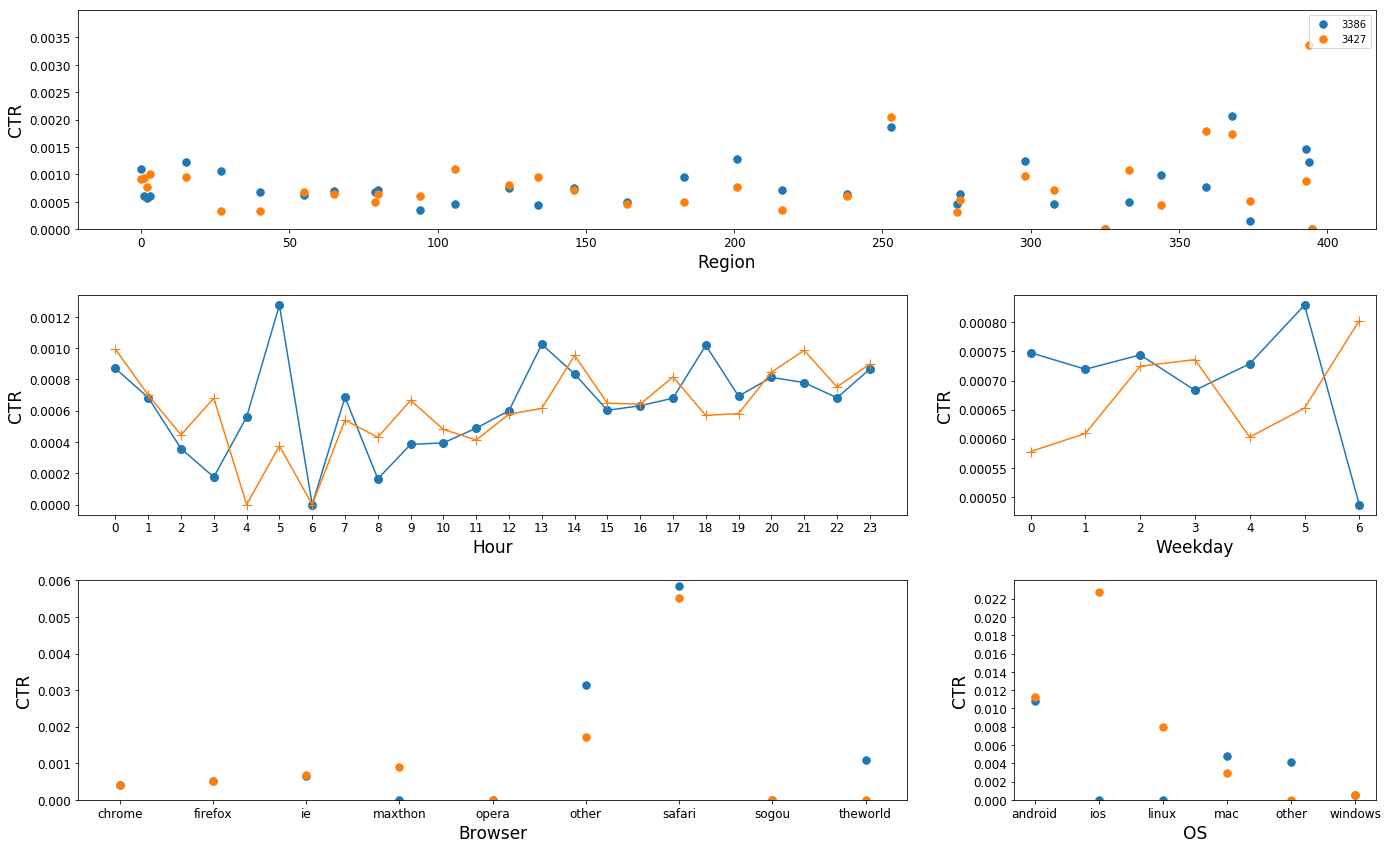

In [46]:
fig1 = plot.figure(figsize=(20,12))

gs = gridspec.GridSpec(3, 3,figure=fig1)
ax1 = plot.subplot(gs[0, :])
plot.scatter(region3386['region'],region3386['CTR'], label = "3386", s = 56)
plot.scatter(region3427['region'],region3427['CTR'], label = "3427", s = 56)
plot.ylim(0.000, 0.004)
plot.yticks(np.arange(0.000, 0.004, 0.0005))
plot.ylabel('CTR',fontsize=17)
plot.xlabel("Region",fontsize=17)
plot.tick_params(labelsize=12)
plot.legend()

ax2 = plot.subplot(gs[1, :-1])
plot.plot(hour3386['hour'],hour3386['CTR'],marker='o',ms=8)
plot.plot(hour3427['hour'],hour3427['CTR'],marker='+',ms=10)
plot.ylabel('CTR',fontsize=17)
plot.xlabel("Hour",fontsize=17)
plot.tick_params(labelsize=12)
plot.xticks(np.arange(0, 24, 1))

ax3 = plot.subplot(gs[1, -1])
plot.plot(week3386['weekday'],week3386['CTR'],marker='o',ms=8)
plot.plot(week3427['weekday'],week3427['CTR'],marker='+',ms=10)
plot.ylabel('CTR',fontsize=17)
plot.xlabel("Weekday",fontsize=17)
plot.tick_params(labelsize=12)

ax4 = plot.subplot(gs[-1, :-1])
plot.scatter(bro3386['browser'],bro3386['CTR'], s = 56)
plot.scatter(bro3427['browser'],bro3427['CTR'], s = 56)
plot.ylim(0.000, 0.0007)
plot.yticks(np.arange(0.000, 0.007, 0.001))
plot.ylabel('CTR',fontsize=17)
plot.xlabel("Browser",fontsize=17)
plot.tick_params(labelsize=12)

ax5 = plot.subplot(gs[-1, -1])
plot.scatter(os3386['os'],os3386['CTR'], s = 56)
plot.scatter(os3427['os'],os3427['CTR'], s = 56)
plot.ylim(0.000, 0.024)
plot.yticks(np.arange(0.000, 0.024, 0.002))
plot.ylabel('CTR',fontsize=17)
plot.xlabel("OS",fontsize=17)
plot.tick_params(labelsize=12)

fig = plot.gcf()
fig.savefig('ctr_features.png', dpi=100)
plot.tight_layout()

# 2. Bidding Price Analysis

In [37]:
p_week3386 = data3386.groupby(['weekday'], as_index=False).mean()

p_week3427 = data3427.groupby(['weekday'], as_index=False).mean()

p_hour3386 = data3386.groupby(['hour'], as_index=False).mean()

p_hour3427 = data3427.groupby(['hour'], as_index=False).mean()

p_os3386 = new3386.groupby(['os'], as_index=False).mean()

p_os3427 = new3427.groupby(['os'], as_index=False).mean()

p_bro3386 = new3386.groupby(['browser'], as_index=False).mean()

p_bro3427 = new3427.groupby(['browser'], as_index=False).mean()

p_region3386 = data3386.groupby(['region'], as_index=False).mean()

p_region3427 = data3427.groupby(['region'], as_index=False).mean()

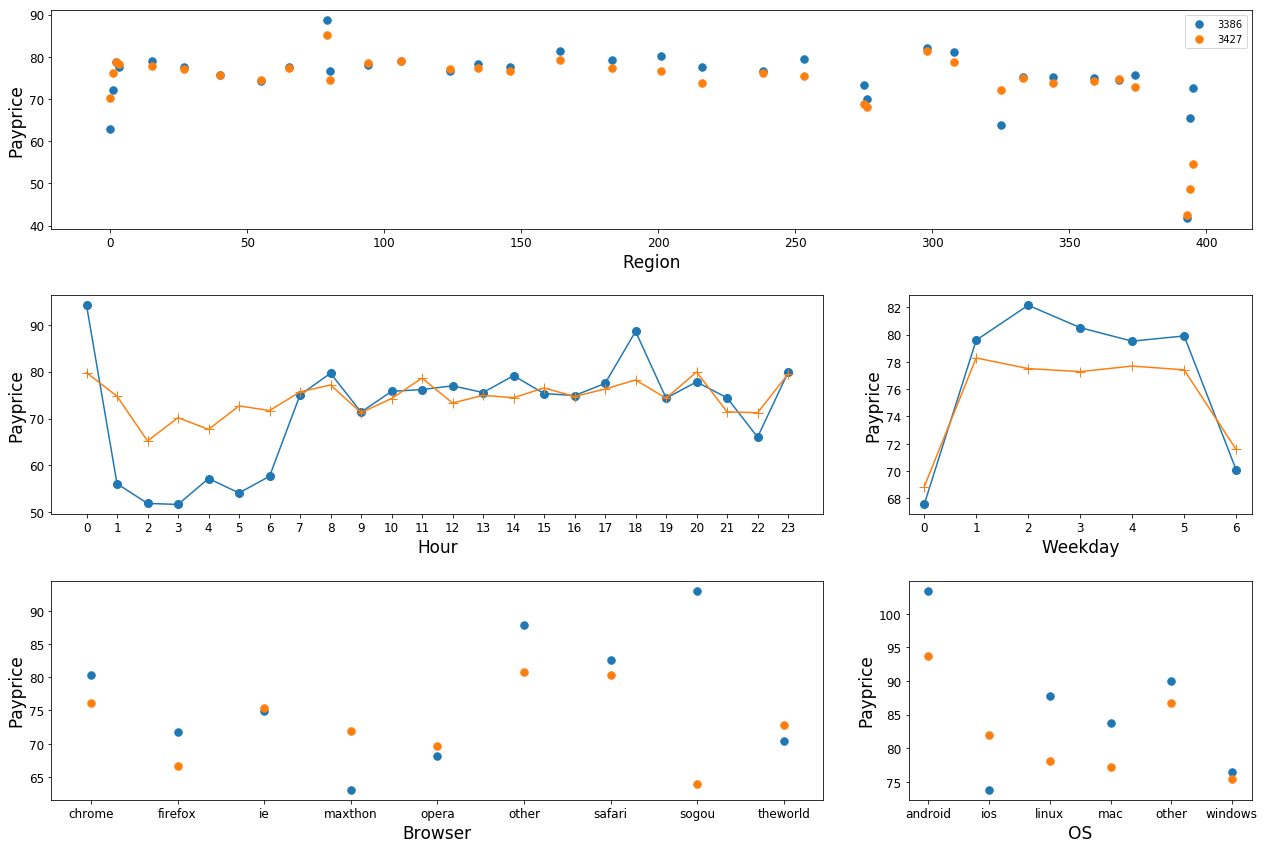

In [43]:
fig2 = plot.figure(figsize=(18,12))
gs2 = gridspec.GridSpec(3, 3, figure = fig2)
axe1 = plot.subplot(gs2[0, :])
plot.scatter(p_region3386['region'],p_region3386['payprice'],s = 56, label = "3386")
plot.scatter(p_region3427['region'],p_region3427['payprice'],s = 56, label = "3427")
plot.ylabel('Payprice',fontsize=17)
plot.xlabel("Region",fontsize=17)
plot.tick_params(labelsize=12)
plot.legend()

axe2 = plot.subplot(gs2[1, :-1])
plot.plot(p_hour3386['hour'],p_hour3386['payprice'],marker='o',ms=8)
plot.plot(p_hour3427['hour'],p_hour3427['payprice'],marker='+',ms=10)
plot.ylabel('Payprice',fontsize=17)
plot.xlabel("Hour",fontsize=17)
plot.tick_params(labelsize=12)
plot.xticks(np.arange(0, 24, 1))

axe3 = plot.subplot(gs2[1, -1])
plot.plot(p_week3386['weekday'],p_week3386['payprice'],marker='o',ms=8)
plot.plot(p_week3427['weekday'],p_week3427['payprice'],marker='+',ms=10)
plot.ylabel('Payprice',fontsize=17)
plot.xlabel("Weekday",fontsize=17)
plot.tick_params(labelsize=12)

axe4 = plot.subplot(gs2[-1, :-1])
plot.scatter(p_bro3386['browser'],p_bro3386['payprice'],s = 56)
plot.scatter(p_bro3427['browser'],p_bro3427['payprice'],s = 56)
plot.ylabel('Payprice',fontsize=17)
plot.xlabel("Browser",fontsize=17)
plot.tick_params(labelsize=12)

axe5 = plot.subplot(gs2[-1, -1])
plot.scatter(p_os3386['os'],p_os3386['payprice'],s = 56)
plot.scatter(p_os3427['os'],p_os3427['payprice'],s = 56)
plot.ylabel('Payprice',fontsize=17)
plot.xlabel("OS",fontsize=17)
plot.tick_params(labelsize=12)

fig = plot.gcf()
fig.savefig('payprice_features.png', dpi=100)
plot.tight_layout()

# 3. Features Correlation Analysis

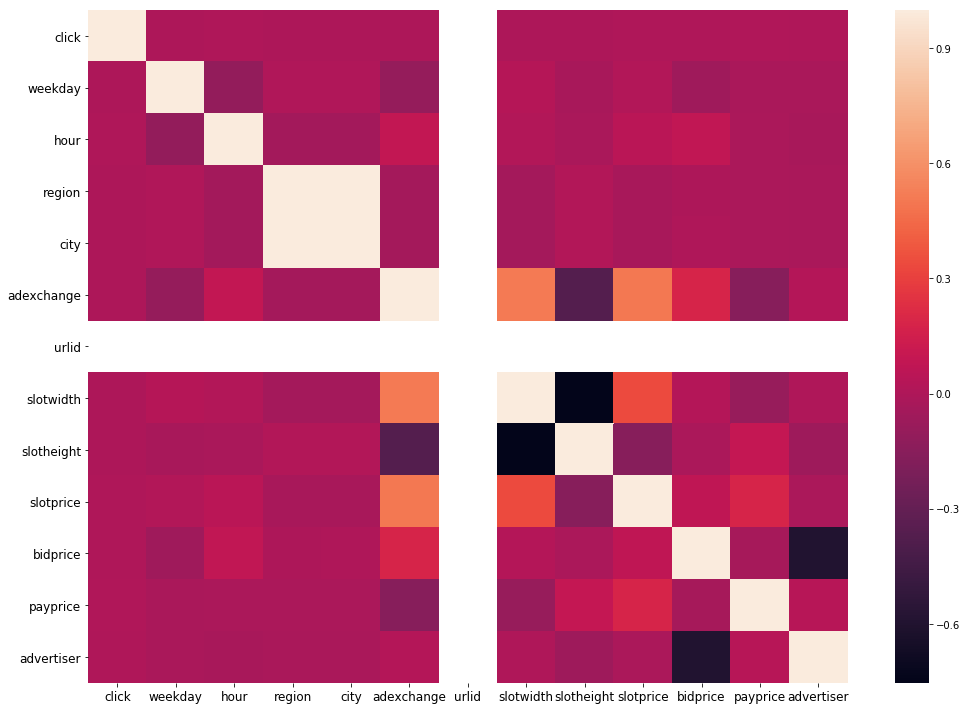

In [138]:
import seaborn as sns
dataset=train.filter(items=['click', 'weekday', 'hour', 'userid', 'IP', 'region', 'city', 'adexchange', 'domain', 'url', 'urlid', 'slotid', 'slotwidth', 'slotheight', 'slotvisibility', 'slotformat', 'slotprice', 'creative', 'bidprice', 'payprice', 'keypage', 'advertiser', 'useragent'])
corr=train.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plot.tick_params(labelsize=12)
fig = plot.gcf()
fig.savefig('feature_cor.png', dpi=100)
plot.tight_layout()

# 4. Price Distribution Analysis

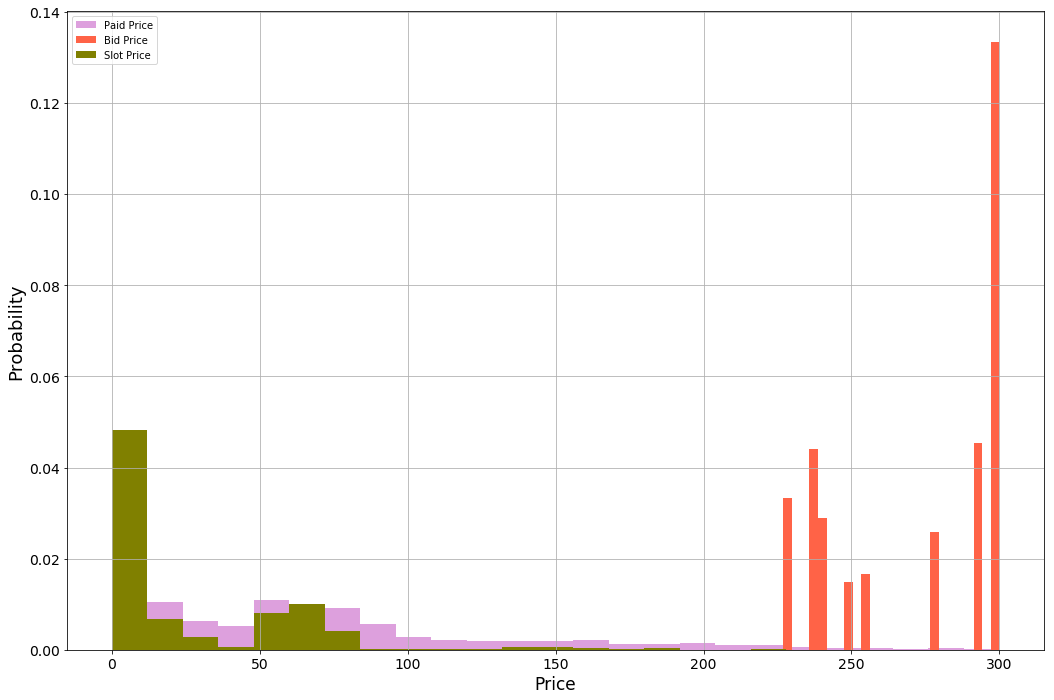

In [140]:
plot.hist(train['payprice'],  25, density =1, facecolor='plum', label='Paid Price')
plot.hist(train['bidprice'], 25, density =1, facecolor='tomato', label='Bid Price')
plot.hist(train['slotprice'], 25, density =1, facecolor='olive', label='Slot Price')
plot.xlabel('Price',fontsize=17)
plot.ylabel('Probability',fontsize=18)
plot.tick_params(labelsize=14)
plot.grid(True)
plot.legend()

fig = plot.gcf()
fig.savefig('price_hist.png', dpi=100)
plot.tight_layout()